In [1]:
import pandas as pd
import seaborn as sns #a plotting libary that is built ontop of matplot
import numpy as np
import matplotlib.pyplot as plt #a plotting libary
from sklearn import model_selection
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,EMPLOYEE_ID,Age,Turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#the data types are well assigned and there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
EMPLOYEE_ID                 1470 non-null int64
Age                         1470 non-null int64
Turnover                    1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

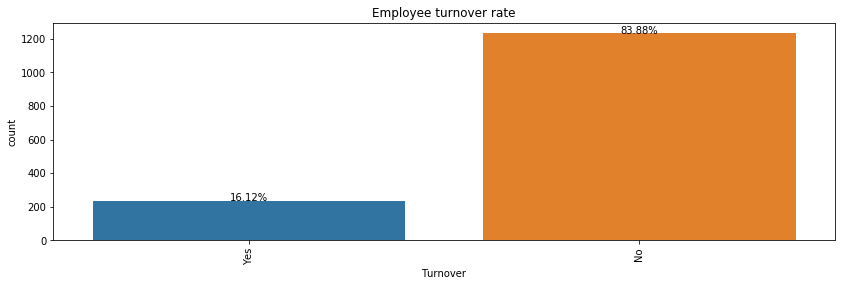

In [4]:
f, ax = plt.subplots(figsize=(14, 4))
ax = sns.countplot(x="Turnover", data=df)

# Add percentage labels on top of each bar
# Calculate percentages and annotate the bars
total = float(len(df))  # Total number of samples
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format((height / total) * 100), ha="center")
    
# Set x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.title(f'Employee turnover rate')
plt.show()

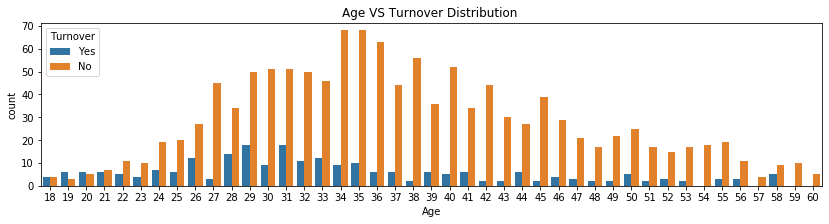

In [5]:
f, ax = plt.subplots(figsize=(14, 3))
ax = sns.countplot(x="Age", hue="Turnover", data=df)
plt.title(f'Age VS Turnover Distribution ')
plt.show()

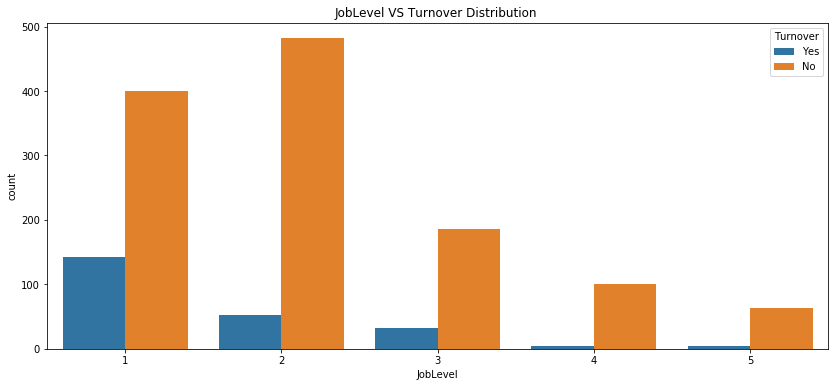

In [6]:
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="JobLevel", hue="Turnover", data=df)
plt.title(f'JobLevel VS Turnover Distribution ')
plt.show()

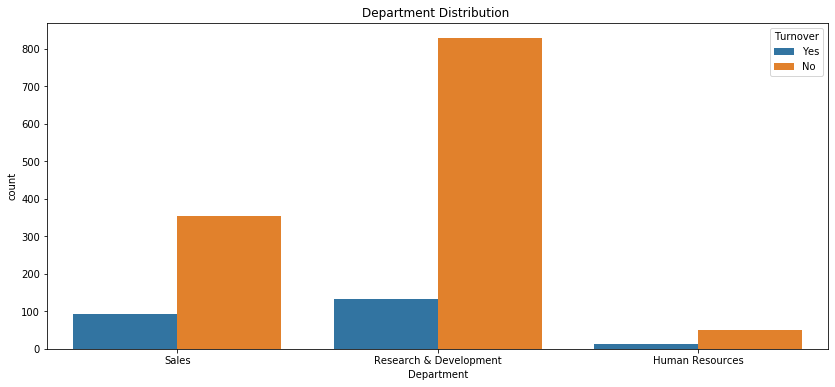

In [7]:
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="Department", hue="Turnover", data=df)
plt.title(f'Department Distribution ')
plt.show()

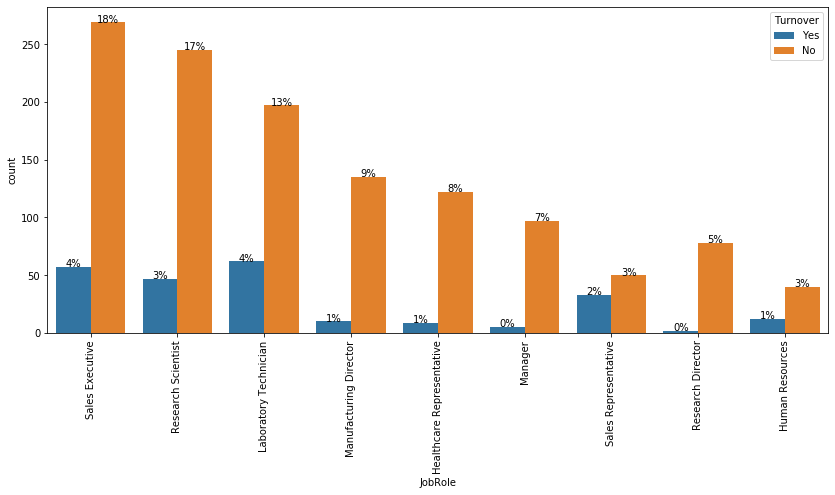

In [8]:
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="JobRole", hue="Turnover", data=df)

# Set x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Calculate percentages and annotate the bars
total = float(len(df))  # Total number of samples
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.0f}%'.format((height / total) * 100), ha="center")


plt.show()

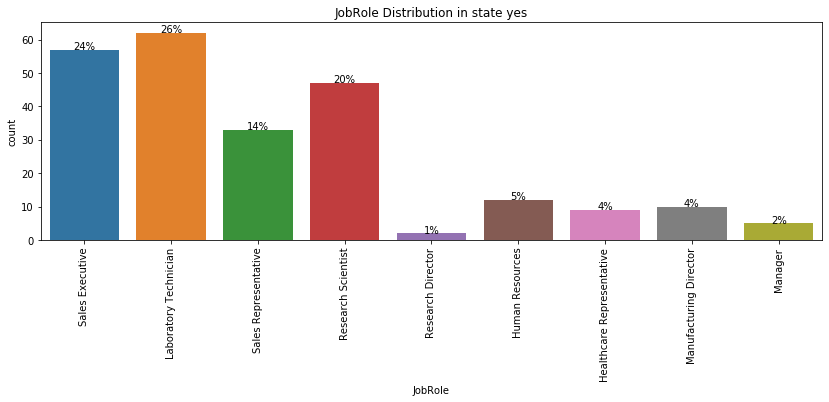

In [9]:
filtered_df = df[(df['Turnover'] == "Yes")]

if filtered_df.empty:
    print("no")
else:
    f, ax = plt.subplots(figsize=(14, 4))
    ax = sns.countplot(x="JobRole", data=filtered_df)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    total = float(len(filtered_df))  # Total number of samples
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.0f}%'.format((height / total) * 100), ha="center")

    plt.title(f'JobRole Distribution in state yes')
    plt.show()

In [10]:
unique = df["JobRole"].unique()

print('unique:')
for role in unique:
    print(role)

unique:
Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representative
Research Director
Human Resources


In [11]:
unique = df["Turnover"].unique()

print('unique:')
for role in unique:
    print(role)

unique:
Yes
No


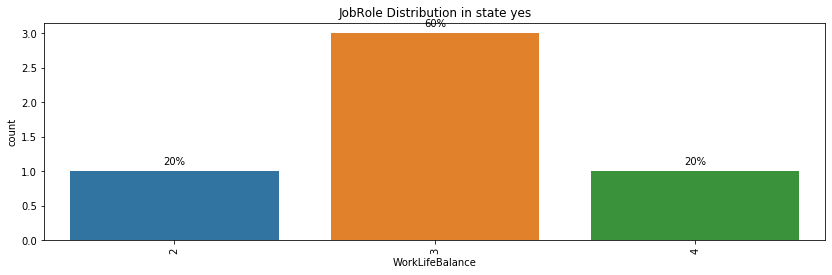

In [12]:
filtered_df = df[(df["Turnover"] == 'Yes') & (df["JobRole"] == 'Manager')]

if filtered_df.empty:
    print("no")
else:
    f, ax = plt.subplots(figsize=(14, 4))
    ax = sns.countplot(x="WorkLifeBalance", data=filtered_df)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    total = float(len(filtered_df))  # Total number of samples
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.0f}%'.format((height / total) * 100), ha="center")

    plt.title(f'JobRole Distribution in state yes')
    plt.show()

## Data cleaning

In [13]:
df['Turnover'] = df['Turnover'].map({'Yes': 1, 'No': 0})

In [14]:
df.head()

,EMPLOYEE_ID,Age,Turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [15]:
df.describe()

,EMPLOYEE_ID,Age,Turnover,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,734.500000,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1469.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

EMPLOYEE_ID
Before Skew : 0.0


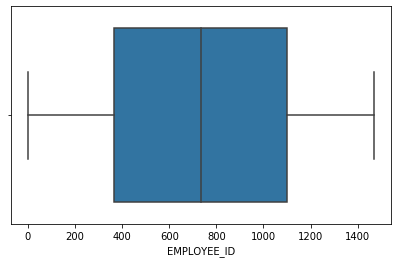

Age
Before Skew : 0.41


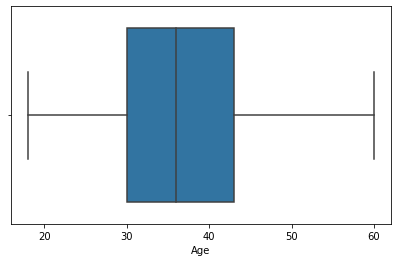

Turnover
Before Skew : 1.84


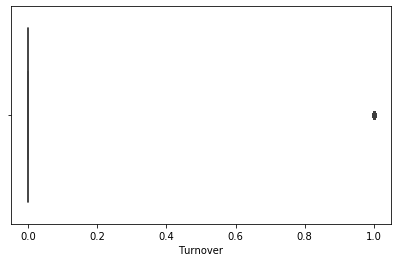

DailyRate
Before Skew : -0.0


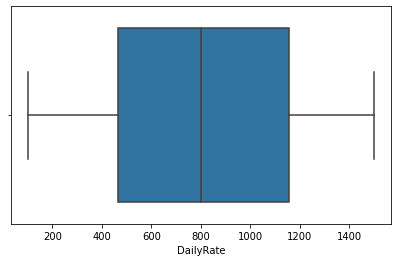

DistanceFromHome
Before Skew : 0.96


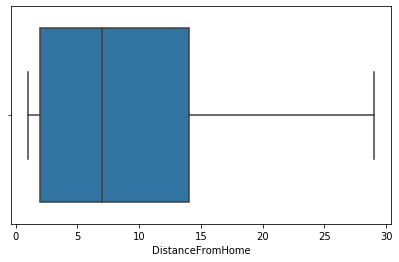

Education
Before Skew : -0.29


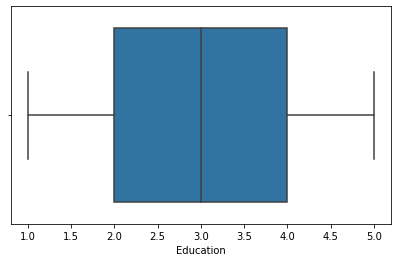

EnvironmentSatisfaction
Before Skew : -0.32


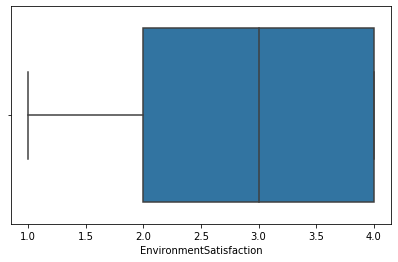

HourlyRate
Before Skew : -0.03


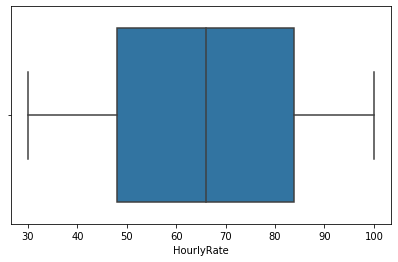

JobInvolvement
Before Skew : -0.5


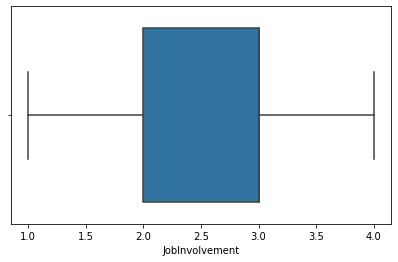

JobLevel
Before Skew : 1.03


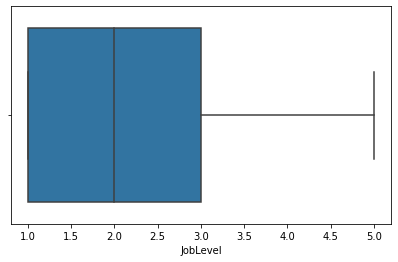

JobSatisfaction
Before Skew : -0.33


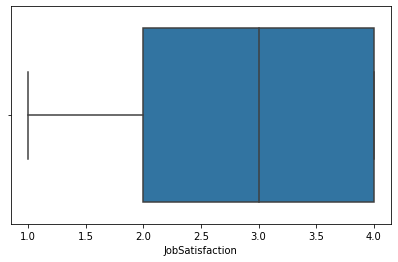

MonthlyIncome
Before Skew : 1.37


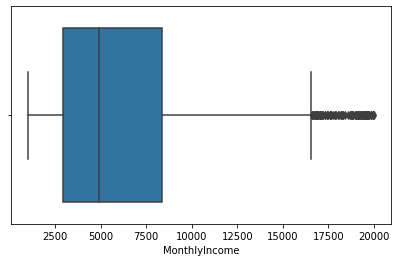

MonthlyRate
Before Skew : 0.02


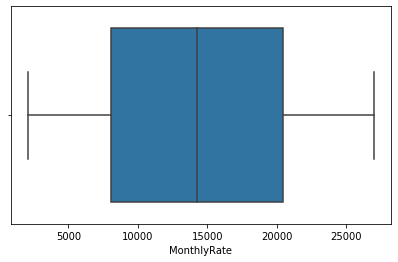

NumCompaniesWorked
Before Skew : 1.03


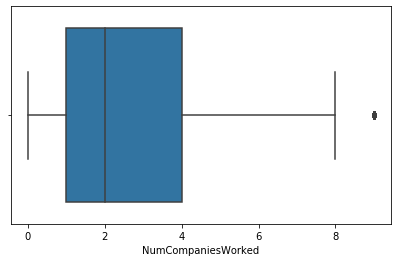

PercentSalaryHike
Before Skew : 0.82


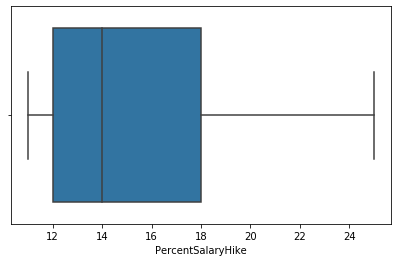

PerformanceRating
Before Skew : 1.92


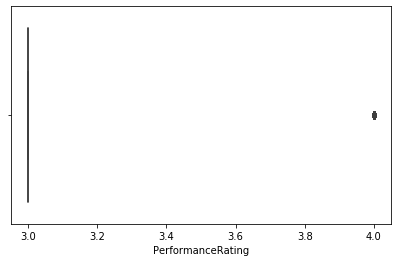

RelationshipSatisfaction
Before Skew : -0.3


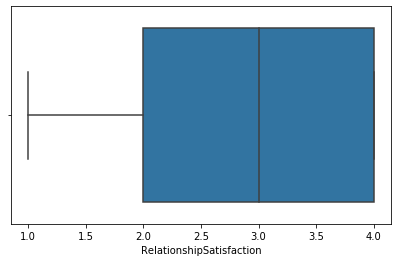

StandardHours
Before Skew : 0


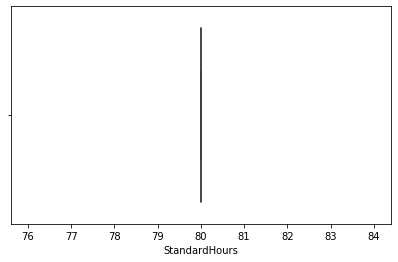

StockOptionLevel
Before Skew : 0.97


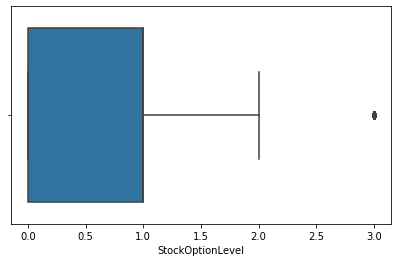

TotalWorkingYears
Before Skew : 1.12


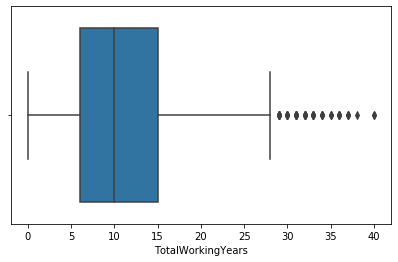

TrainingTimesLastYear
Before Skew : 0.55


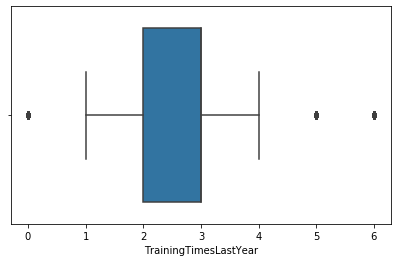

WorkLifeBalance
Before Skew : -0.55


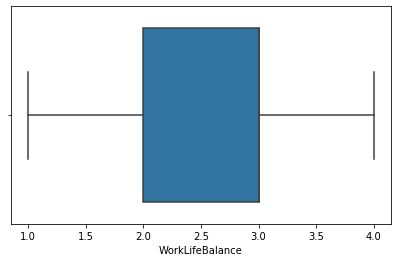

YearsAtCompany
Before Skew : 1.76


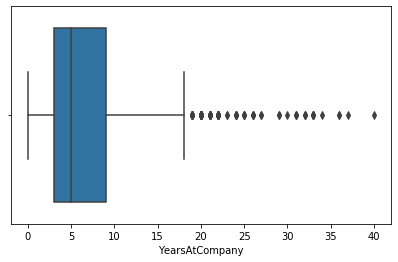

YearsInCurrentRole
Before Skew : 0.92


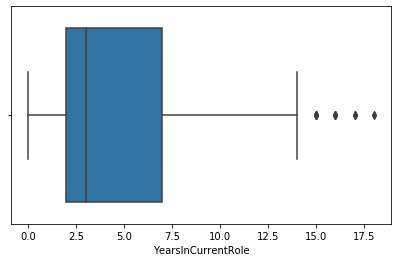

YearsSinceLastPromotion
Before Skew : 1.98


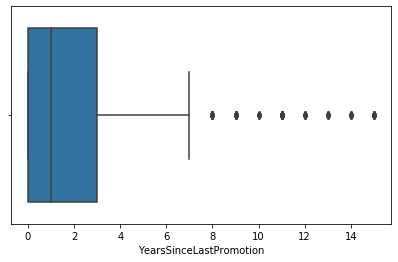

YearsWithCurrManager
Before Skew : 0.83


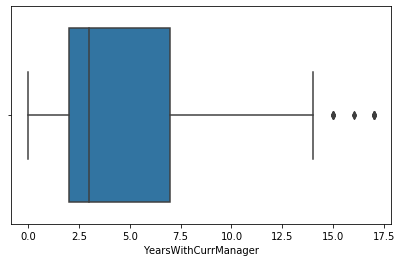

In [17]:
for col in num_cols:
    print(col)
    print('Before Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.show()

In [18]:
import numpy as np

def iqr_capping(df, exclude_col=None):

    """

    Caps outliers in numerical columns using the IQR method, excluding a specified column.

    Parameters:

    - df: DataFrame to process.

    - exclude_col: Column to exclude from capping (e.g., 'Turnover').

    Returns:

    - df: DataFrame with capped values.

    """

    for col in df.columns:

        # Skip non-numeric columns and the excluded column

        if df[col].dtype != 'object' and col != exclude_col:

            q1 = df[col].quantile(0.25)  # First quartile

            q3 = df[col].quantile(0.75)  # Third quartile

            iqr = q3 - q1  # Interquartile range

            # Define whiskers

            upper_whisker = q3 + (1.5 * iqr)

            lower_whisker = q1 - (1.5 * iqr)

            # Cap values beyond whiskers

            df[col] = np.where(

                df[col] > upper_whisker, upper_whisker,

                np.where(df[col] < lower_whisker, lower_whisker, df[col])

            )

    return df

# Example usage

# Exclude the 'Turnover' column from outlier capping

final_df = iqr_capping(df, exclude_col='Turnover') 

EMPLOYEE_ID
After Skew : 0.0


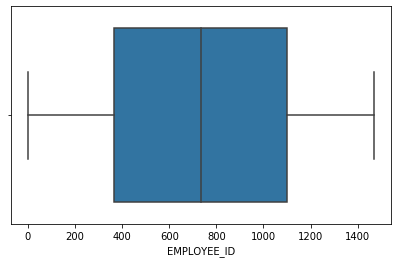

Age
After Skew : 0.41


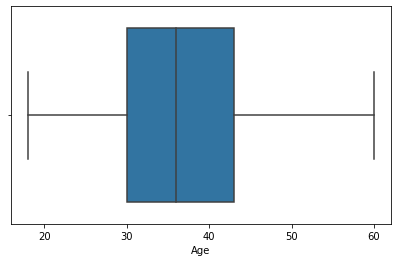

Turnover
After Skew : 1.84


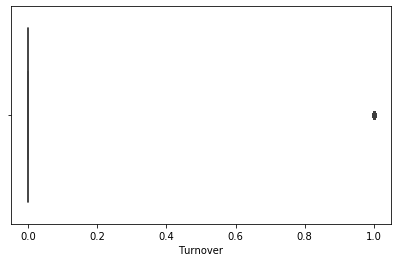

DailyRate
After Skew : -0.0


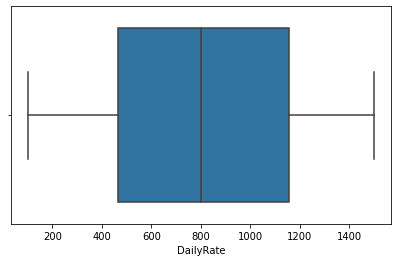

DistanceFromHome
After Skew : 0.96


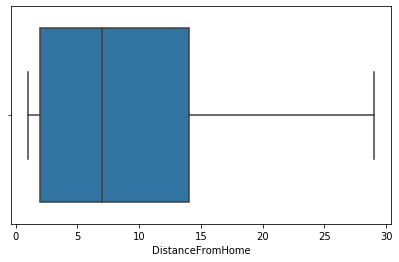

Education
After Skew : -0.29


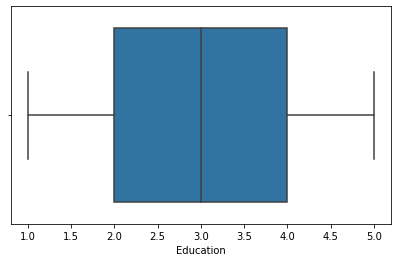

EnvironmentSatisfaction
After Skew : -0.32


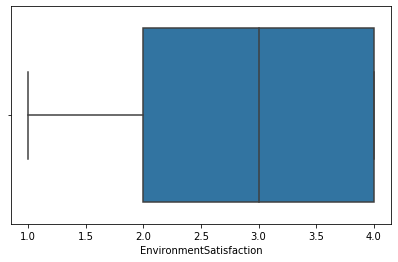

HourlyRate
After Skew : -0.03


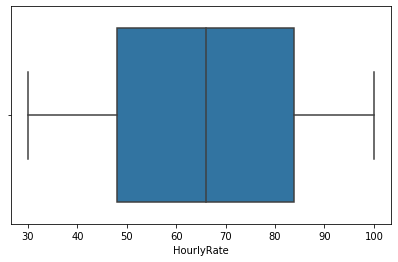

JobInvolvement
After Skew : -0.5


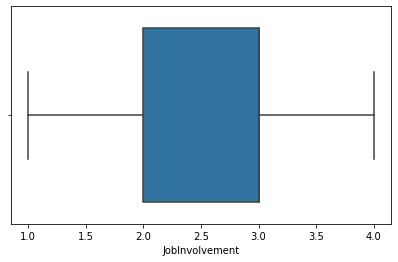

JobLevel
After Skew : 1.03


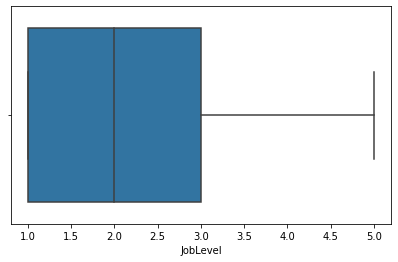

JobSatisfaction
After Skew : -0.33


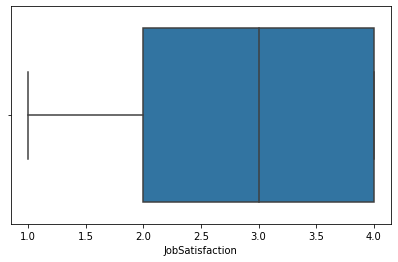

MonthlyIncome
After Skew : 1.17


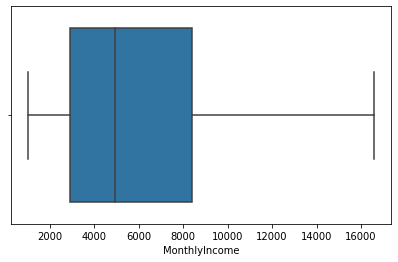

MonthlyRate
After Skew : 0.02


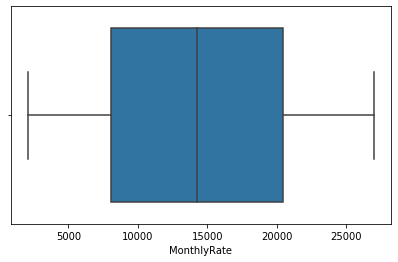

NumCompaniesWorked
After Skew : 0.97


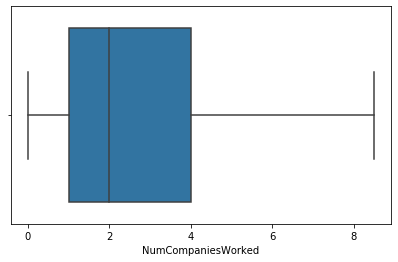

PercentSalaryHike
After Skew : 0.82


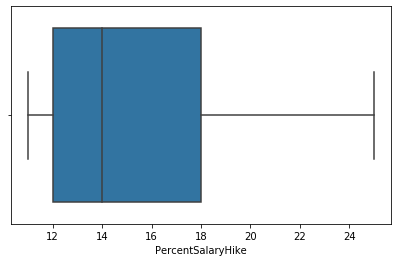

PerformanceRating
After Skew : 0


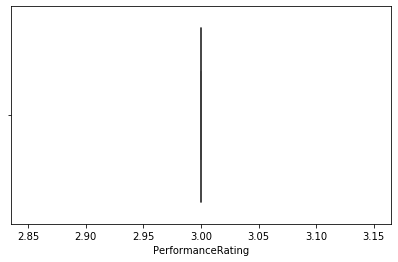

RelationshipSatisfaction
After Skew : -0.3


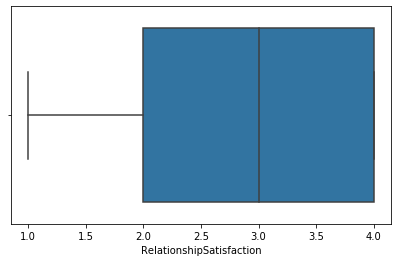

StandardHours
After Skew : 0


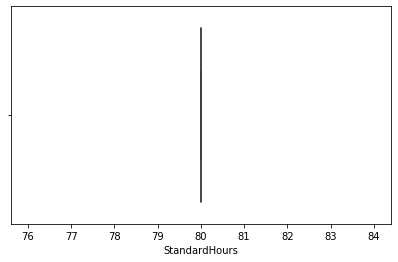

StockOptionLevel
After Skew : 0.66


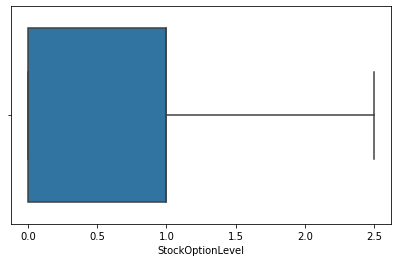

TotalWorkingYears
After Skew : 0.86


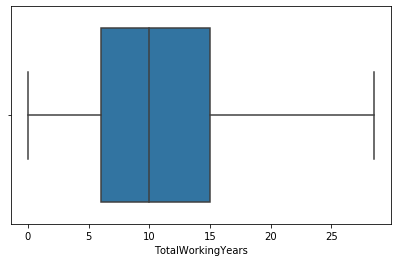

TrainingTimesLastYear
After Skew : 0.12


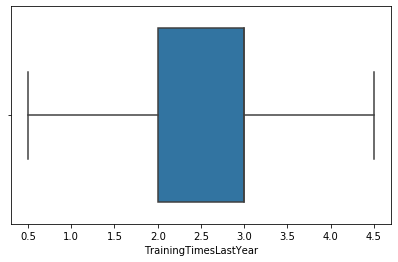

WorkLifeBalance
After Skew : -0.55


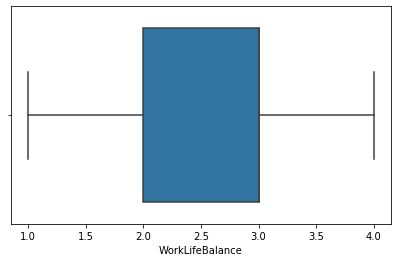

YearsAtCompany
After Skew : 0.9


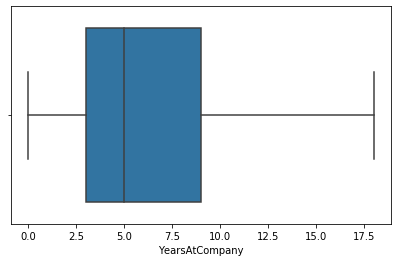

YearsInCurrentRole
After Skew : 0.8


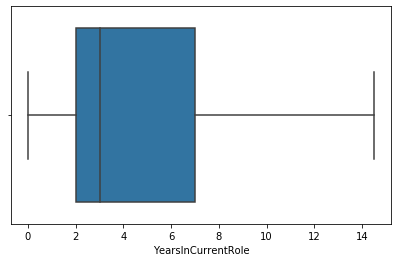

YearsSinceLastPromotion
After Skew : 1.26


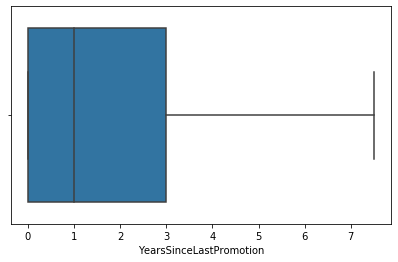

YearsWithCurrManager
After Skew : 0.74


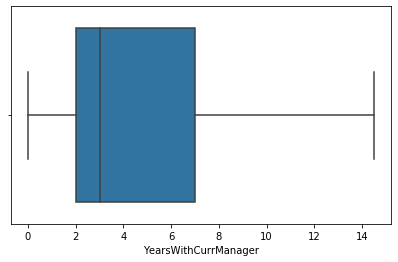

In [19]:
for col in num_cols:
    print(col)
    print('After Skew :', round(final_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=final_df[col])
    plt.show()

In [20]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
final_df['BusinessTravel']=le.fit_transform(final_df['BusinessTravel'])
final_df['Department']=le.fit_transform(final_df['Department'])
final_df['EducationField']=le.fit_transform(final_df['EducationField'])
final_df['Gender']=le.fit_transform(final_df['Gender'])
final_df['JobRole']=le.fit_transform(final_df['JobRole'])
final_df['MaritalStatus']=le.fit_transform(final_df['MaritalStatus'])
final_df['OverTime']=le.fit_transform(final_df['OverTime'])

In [21]:
drop = ['Over18','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear']
final_df.drop(columns=drop, inplace=True)

## Selection

turnover_vars=df_clean.columns.values.tolist()
y=['Turnover']
X=[i for i in turnover_vars if i not in y]

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Ensure y is a Series and properly extracted
y = final_df['Turnover']  
X = final_df.drop(columns=['Turnover'])  

# Check class distribution
print(y.value_counts())

# Handle imbalance if necessary
model = LogisticRegression(class_weight='balanced')
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit the model
rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)


0    1233
1     237
Name: Turnover, dtype: int64
[False False False False  True False False False  True  True False  True
  True False  True  True False False False  True False False False False
  True False False  True False]
[19 12 13 17  1 11 14  5  1  1 15  1  1  8  1  1 18 20  4  1 10 16  3  9
  1  7  6  1  2]


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
EMPLOYEE_ID                 1470 non-null float64
Age                         1470 non-null float64
Turnover                    1470 non-null int64
BusinessTravel              1470 non-null int32
DailyRate                   1470 non-null float64
Department                  1470 non-null int32
DistanceFromHome            1470 non-null float64
Education                   1470 non-null float64
EducationField              1470 non-null int32
EnvironmentSatisfaction     1470 non-null float64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null float64
JobInvolvement              1470 non-null float64
JobLevel                    1470 non-null float64
JobRole                     1470 non-null int32
JobSatisfaction             1470 non-null float64
MaritalStatus               1470 non-null int32
MonthlyIncome               1470 non-null float64
Monthly

## This is to make sure that the the selected inputs do not have any correlation

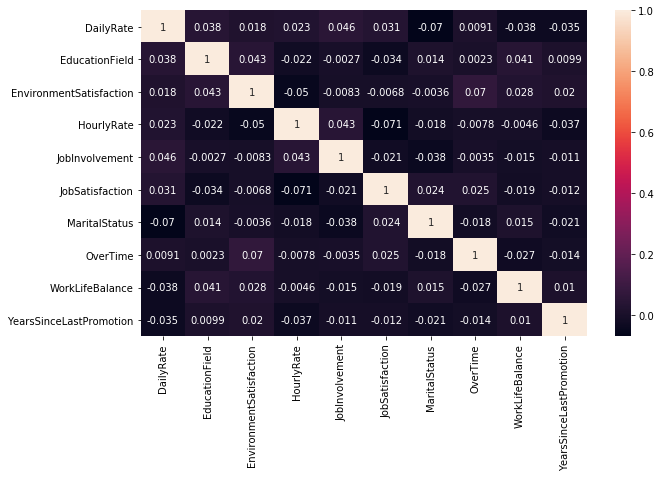

In [24]:
ten_features =final_df[['DailyRate','EducationField','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','WorkLifeBalance','YearsSinceLastPromotion']]
plt.figure(figsize=(10,6))
correlation_mat = ten_features.corr()
ax= sns.heatmap(correlation_mat, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Feature ranking:
1. feature DailyRate (0.215140)
2. feature HourlyRate (0.181248)
3. feature EducationField (0.088312)
4. feature YearsSinceLastPromotion (0.085192)
5. feature EnvironmentSatisfaction (0.078168)
6. feature OverTime (0.073649)
7. feature JobInvolvement (0.071618)
8. feature JobSatisfaction (0.071244)
9. feature WorkLifeBalance (0.070993)
10. feature MaritalStatus (0.064436)


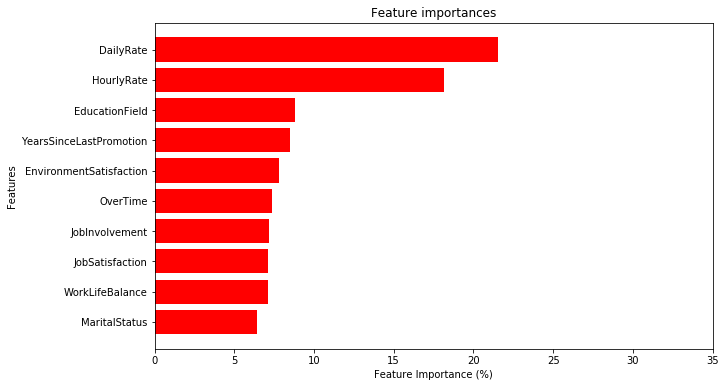

In [25]:
X = ten_features.iloc[:,0:] # Features
y = final_df.loc[:,'Turnover']  # Target variable

# Create a random forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], feature_importances[indices[f]]))

# Plot the feature importances horizontally starting from the most important feature
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), feature_importances[indices][::-1], color="r", align="center")
plt.yticks(range(X.shape[1]), X.columns[indices][::-1])
plt.xlabel('Feature Importance')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Features')
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35], ['0', '5', '10', '15', '20', '25', '30', '35'])
plt.show()

In [26]:
X1 = final_df[['DailyRate','HourlyRate','YearsSinceLastPromotion','EducationField','EnvironmentSatisfaction','Turnover']]
#Y1 = final_df[['Turnover']]

In [27]:
#from sklearn.cross_validation import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier with a lower number of trees
rf = RandomForestClassifier(n_estimators=5,min_samples_leaf=5)
# Train the random forest model on your training data
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred= rf.predict(X_test)
from sklearn.metrics import classification_report,balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

class_report_train = classification_report(y_test, rf.predict(X_test))
#print (rf.score(x_train, y_train), '- Train model score')
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, rf.predict(X_test))), '\n\n')
print(class_report_train)

Random Forest Accuracy: 0.83 


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       371
           1       0.44      0.16      0.23        70

    accuracy                           0.83       441
   macro avg       0.65      0.56      0.57       441
weighted avg       0.79      0.83      0.80       441



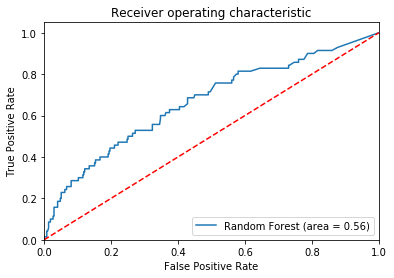

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()